In [6]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import choice

In [12]:
class Theater:
    def __init__(self):
        self.movies = [
            {"name": "Wonder Woman", "NC-17": True},
            {"name": "Fast And Furious five", "NC-17": True},
            {"name": "The Little Things", "NC-17": True},
            {"name": "The King s Man", "NC-17": True},
            {"name": "No Time to Die", "NC-17": True},
            {"name": "tom and jary", "NC-17": False},
            {"name": "Soul", "NC-17": False},
            {"name": "Vivo", "NC-17": False},
            {"name": "Luca", "NC-17": False},
            {"name": "Minions: The Rise of Gru", "NC-17": False} 
        ]
        self.week_days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', "Thr", "Fri"]
        self.colors = ['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f', '#90be6d', '#277da1']
        self.week_revenue = []
        self.revenue_details = {}
        self.seats = 30
        self.screan = 5
        self.ticket_prices = {
            "children": 15,
            "adults": 35,
            "senior": 25
        }
        
    # Buthaina
    def generate_visetors(self,NC_17):
        '''
            def generate_visetors():
                generat a random number of visetors acordeng to the movie Category 
                NC_17: the function parameter ,it refers to movie Category
                    if movieCategory(NC_17) = True --> children not allowed 
                    if movieCategory(NC_17) = False --> children allowed

        '''
        adults, seniors, children = 0, 0, 0

        if NC_17:
            while(adults + seniors <= self.seats):
                adults, seniors = random.choices(range(1, self.seats + 1), k=2)
        else:
            while(adults + seniors + children <= self.seats):
                children, adults, seniors = random.choices(range(1, self.seats + 1), k=3)
        
        return children, adults ,seniors
    
    # Mohammed
    def movie_screen(self):
        '''
            def movie_screen():
                screens_movies_list=[] --> contain the movies for all screan 
                movie --> the moves will picked randomly from the movies list 
                movie_count --> pick random number of movies for each screen with max = 5

        '''  
        screens_movies_list=[]
        for i in range(1,self.screan + 1):
            
            movie_count = choice(range(1, 6), p=[0.25, 0.3, 0.3, 0.1, 0.05])
            movie = random.choices(x.movies, k=movie_count)
            
            # add it to global list
            screens_movies_list.append(movie)
        return screens_movies_list
    # Tahani
    def calculate_revenue(self, screens_movies_list, discount=0.0):
        '''
          def calculate_revenue(screens_movies_list, discount=0.0):
              The Parameters : 
                  screens_movies_list --> its the return of movie_screen() 
                  discount --> ticket discount

              for each scren generate_visetors(with movieCategory (True/False))
              add to current_day_revenue
        '''
        current_day_revenue = 0
        for screen in screens_movies_list:
            for movie in screen:
                children, adults, seniors = self.generate_visetors(movie["NC-17"])
                current_day_revenue += (children * self.ticket_prices["children"]) + (adults * self.ticket_prices["adults"]) + (seniors * self.ticket_prices["senior"] * (1-discount))
                
        return current_day_revenue
    # Tahani
    def start_simulation(self, iterations = 1000):
        '''
    
         def start_simulation(iterations = 1000):
             The Parameters : 
                 iterations --> it by default =1000 

             for the range of the iterations 
                 for the range of the week_days
                     discount for seniors by 10% if it in day 7 (Friday) 
                     append to revenue_details []

             week_revenue--> it is the average for revenue_details
             index --> the max week_revenue

        '''
        self.revenue_details = {}
        
        for iteration in range(1, iterations + 1):
            self.revenue_details[iteration] = []
            
            for i in range(1, len(self.week_days) + 1):
                if(i == 7):
                    ## Apply discount for Fridays
                    self.revenue_details[iteration].append(x.calculate_revenue(x.movie_screen(), discount=0.1))
                else:
                    self.revenue_details[iteration].append(x.calculate_revenue(x.movie_screen()))
        
        print("## Calculating the revenue ##")
        
        self.week_revenue = [0, 0, 0, 0, 0 ,0 ,0]
        
        for iteration in range(1, len(self.revenue_details)+1):
            for day in range(0, 7):
                self.week_revenue[day] += self.revenue_details[iteration][day]

        #         self.week_revenue = [i/1000.0 for i in self.week_revenue]
        
        for i in range(0, len(self.week_revenue)):
            print('%-*s: $%5s' % (4, self.week_days[i], self.week_revenue[i]))
            
            
        index = self.week_revenue.index(max(self.week_revenue))
            
        print("\n## The Highest Day is {} with ${} ##".format(self.week_days[index], self.week_revenue[index]))
    
    # Mazen
    def plot_total(self):
        """
        plot_total:
            plots the total revenue for each day
        """
        for i in range(len(self.week_revenue)):
            plt.annotate(int(self.week_revenue[i]), xy=(self.week_days[i],self.week_revenue[i]), ha='center', va='bottom')
        plt.rcParams["figure.figsize"] = (30, 6)
        plt.bar(self.week_days, self.week_revenue, color=self.colors)
        plt.title("Theater Simulation")
        plt.xlabel('Week Days')
        plt.ylabel('Revenue ($)')
        plt.show()
        
    # Mazen
    def split_data(self):
        """
        split_data:
            split & compute the average revenue of each 100 days for plotting
        """
        
        # Find the suitable split for showing the data
        factor = len(self.revenue_details)/10
        
        # Split the data according to the factor
        factors = [i for i in self.revenue_details if i%factor == 0]

        temp_result = []
        last_value = 0
        temp_list = list(self.revenue_details.items())
        
        # Get the list of days from each element
        cleaned_data = [i[1] for i in temp_list]
        
        for f in factors:
            temp_result.append(cleaned_data[last_value:f])
            last_value = f # keep the pervious value for splitting
            
        result = []
        for k in temp_result:
            # Get the mean for each day
            result.append([pd.DataFrame(k)[i].mean() for i in range(0, 7)])
            
        return factors, result
    
    # Mazen 
    def plot_details(self):
        """
        plot_details:
            plot the revenue details for each day across 1000 iterations
        """
        factors, data = self.split_data()
        
        cleaned_df = pd.DataFrame(data)
        
        plt.figure(figsize=(10,5))
        # Plotting all the curves simultaneously
        
        for i in range(0, len(self.week_days)):
            plt.plot(factors, cleaned_df[i],color=self.colors[i], label=self.week_days[i])

        # Naming the x-axis, y-axis and the whole graph
        plt.xlabel("Days")
        plt.ylabel("Revenue ($)")
        plt.title("Revenue Simulation")
        
        # Adding legend, which helps us recognize the curve according to it's color
        plt.legend()
        plt.show()

In [13]:
x = Theater()
x.start_simulation()

## Calculating the revenue ##
Sat : $15118960.0
Sun : $15017110.0
Mon : $14964955.0
Tue : $14807930.0
Wed : $14903455.0
Thr : $14968880.0
Fri : $14309337.5

## The Highest Day is Sat with $15118960.0 ##


In [ ]:
x.revenue_details

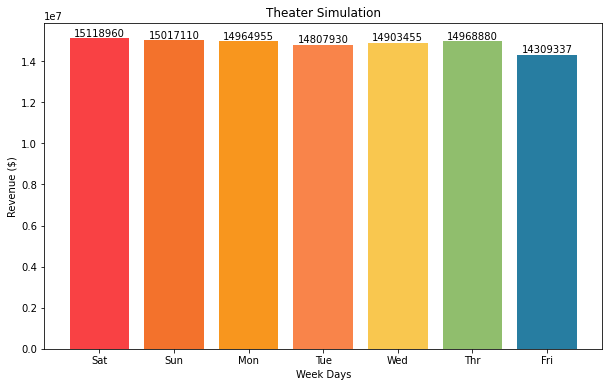

In [15]:
x.plot_total()

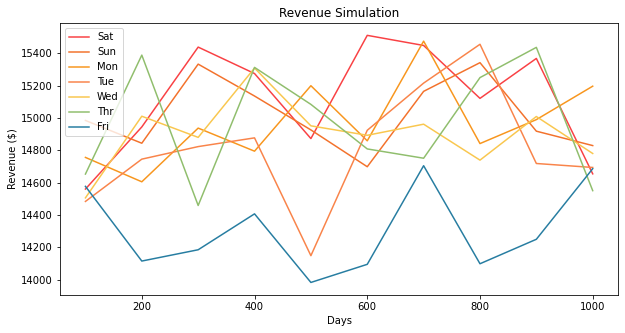

In [16]:
x.plot_details()